In [1]:
import sys
sys.path.append('..')

from aural_travels.data import fma

## 1 Load Data

In [2]:
# Adjust this to your local copy of the FMA dataset.
# Should contain `fma_dataset` and `fma_metadata` directories.
DATA_DIR = '/home/leo/data/fma'

genres = fma.load_genres(DATA_DIR)
tracks = fma.load_tracks(DATA_DIR)

## 2 Genres

In [3]:
# All genres
genres

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
...,...,...,...,...
1032,60,102,Turkish,2
1060,30,46,Tango,2
1156,26,130,Fado,2


In [4]:
# Top-level genres
genres[genres.parent == 0]

,#tracks,parent,title,top_level
genre_id,,,,
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9
10,13845,0,Pop,10
12,32923,0,Rock,12
13,730,0,Easy Listening,13


## 3 Tracks

In [5]:
# The track metadata contains four sets of columns:
# track, album, artist, and set.
tracks.columns.values

array([('album', 'comments'), ('album', 'date_created'),
       ('album', 'date_released'), ('album', 'engineer'),
       ('album', 'favorites'), ('album', 'id'), ('album', 'information'),
       ('album', 'listens'), ('album', 'producer'), ('album', 'tags'),
       ('album', 'title'), ('album', 'tracks'), ('album', 'type'),
       ('artist', 'active_year_begin'), ('artist', 'active_year_end'),
       ('artist', 'associated_labels'), ('artist', 'bio'),
       ('artist', 'comments'), ('artist', 'date_created'),
       ('artist', 'favorites'), ('artist', 'id'), ('artist', 'latitude'),
       ('artist', 'location'), ('artist', 'longitude'),
       ('artist', 'members'), ('artist', 'name'),
       ('artist', 'related_projects'), ('artist', 'tags'),
       ('artist', 'website'), ('artist', 'wikipedia_page'),
       ('set', 'split'), ('set', 'subset'), ('track', 'bit_rate'),
       ('track', 'comments'), ('track', 'composer'),
       ('track', 'date_created'), ('track', 'date_recorded'),
   

In [6]:
tracks['album'].sample(3)

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
130718,0,2016-01-13 04:12:34,2010-01-01,NaN,0,19684,<p>I don't think that all this can be understo...,11622,NaN,[],Structures Anthropologiques de l'Imaginaire de...,17,Album
96074,0,2013-12-11 17:38:04,2013-12-11,NaN,0,15627,<p>Kingstux released his first track through P...,8225,Kingstux,"[experimental, techno, electronica]",The Illusion is Worth Fighting For,16,Album
89322,2,2013-08-20 11:11:37,2013-09-01,NaN,19,14915,<p>Centuries ago a pirate ship sank in the Pac...,350338,NaN,[],The Pirate And The Dancer,10,Album


In [7]:
tracks['album', 'id'].nunique()

14854

## 4 Genre Distributions

The following code relies in the album-level metadata, which we have generated as described in the top-level README.

In [8]:
albums = fma.load_albums(DATA_DIR)

### Track-Level Genre Distribution

<AxesSubplot:>

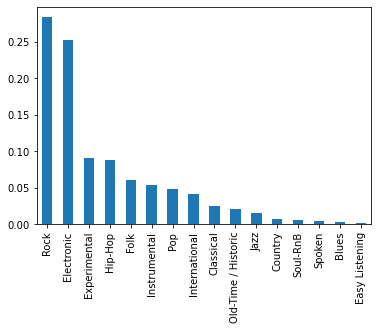

In [49]:
tracks_pred = tracks[~tracks['track', 'genre_top'].isnull()]
tracks_pred[tracks_pred['set', 'subset'] != 'large']['track', 'genre_top'] \
    .value_counts(normalize=True) \
    .plot(kind='bar')

### Album-Level Genre Distribution

<AxesSubplot:>

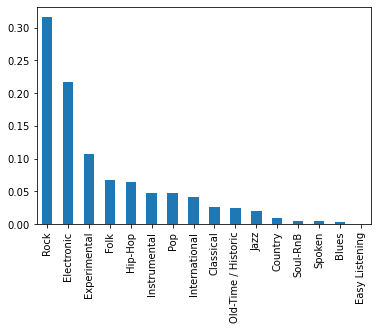

In [41]:
albums_pred = albums[~albums['genre_top'].isnull()]
albums_pred[albums_pred['subset'] != 'large']['genre_top'] \
    .value_counts(normalize=True) \
    .plot(kind='bar')

### Data for Predicting Genre from Cover

<AxesSubplot:>

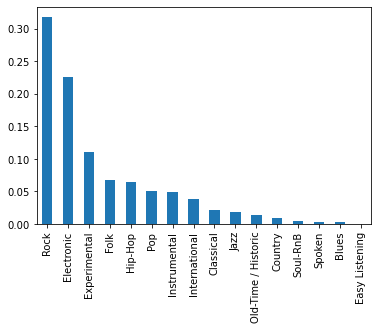

In [39]:
albums_pred = albums[~albums['genre_top'].isnull() & (albums['has_cover'] == True)]
albums_pred[albums_pred['subset'] != 'large']['genre_top'].value_counts(normalize=True).plot(kind='bar')